#                                                 Mith Project

Problem : Impact of Medication for Lifestyle 
Diseases on Hospital Readmission

Name:         K.Ajay shankar  
CWRU ID:      axk1650  
INSOFE ID:    4971  
INSOFE Batch: Batch-120

# Problem Statement

Management of lifestyle diseases in hospitalized patients has a significant bearing on 
outcome, in terms of both morbidity and mortality. The main object for this problem is to 
predict whether a patient is likely to be readmitted to hospital based on the previous details of 
the patient.

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Reading the data files (hosp_Read = Hospital Readmission)
hosp_Read = pd.read_csv('Train-1617360447408-1660719685476.csv')

# Data exploration & Feature Engineering

In [3]:
# Checking number of observations and attributes.
hosp_Read.shape

(66587, 49)

In [4]:
# Printing the column names
hosp_Read.columns

Index(['index', 'encounter_id', 'patient_id', 'race', 'gender', 'age',
       'weight', 'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'diag_4', 'diag_5', 'number_diagnoses', 'X1', 'X2', 'X3', 'X4', 'X5',
       'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16',
       'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')

In [5]:
# Checking data types
hosp_Read.dtypes

index                   int64
encounter_id            int64
patient_id              int64
race                   object
gender                 object
age                    object
weight                 object
time_in_hospital        int64
medical_specialty      object
num_lab_procedures      int64
num_procedures          int64
num_medications         int64
number_outpatient       int64
number_emergency        int64
number_inpatient        int64
diag_1                 object
diag_2                 object
diag_3                 object
diag_4                 object
diag_5                float64
number_diagnoses        int64
X1                     object
X2                     object
X3                     object
X4                     object
X5                     object
X6                     object
X7                     object
X8                     object
X9                     object
X10                    object
X11                    object
X12                    object
X13       

In [6]:
# Checking for null values
hosp_Read.isnull().sum()

index                 0
encounter_id          0
patient_id            0
race                  0
gender                0
age                   0
weight                0
time_in_hospital      0
medical_specialty     0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
diag_1                0
diag_2                0
diag_3                0
diag_4                0
diag_5                0
number_diagnoses      0
X1                    0
X2                    0
X3                    0
X4                    0
X5                    0
X6                    0
X7                    0
X8                    0
X9                    0
X10                   0
X11                   0
X12                   0
X13                   0
X14                   0
X15                   0
X16                   0
X17                   0
X18                   0
X19                   0
X20                   0
X21             

In [7]:
# Converting '?' & 'Unknown/Invalid' to 'Na'
hosp_Read = hosp_Read.replace('?', np.nan)
hosp_Read = hosp_Read.replace('Unknown/Invalid', np.nan)

In [8]:
hosp_Read.isnull().sum()

index                     0
encounter_id              0
patient_id                0
race                   1504
gender                    2
age                       0
weight                64454
time_in_hospital          0
medical_specialty     32672
num_lab_procedures        0
num_procedures            0
num_medications           0
number_outpatient         0
number_emergency          0
number_inpatient          0
diag_1                   15
diag_2                  231
diag_3                  954
diag_4                  954
diag_5                    0
number_diagnoses          0
X1                        0
X2                        0
X3                        0
X4                        0
X5                        0
X6                        0
X7                        0
X8                        0
X9                        0
X10                       0
X11                       0
X12                       0
X13                       0
X14                       0
X15                 

In [9]:
# Dropping weight & medical_specialty because most of the data is not available

hosp_Read = hosp_Read.drop(columns= ['weight', 'medical_specialty'], axis=1)

In [10]:
# Dropping missing value rows (as they contribute less than 5% of data)

hosp_Read.dropna(inplace = True)

In [11]:
hosp_Read.shape

(64128, 47)

In [12]:
hosp_Read.isnull().sum()

index                 0
encounter_id          0
patient_id            0
race                  0
gender                0
age                   0
time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
diag_1                0
diag_2                0
diag_3                0
diag_4                0
diag_5                0
number_diagnoses      0
X1                    0
X2                    0
X3                    0
X4                    0
X5                    0
X6                    0
X7                    0
X8                    0
X9                    0
X10                   0
X11                   0
X12                   0
X13                   0
X14                   0
X15                   0
X16                   0
X17                   0
X18                   0
X19                   0
X20                   0
X21                   0
X22                   0
X23             

In [13]:
# Dropping 'index' & 'patient_id' as they have high cardinality & setting 'encounter_id' as index

hosp_Read = hosp_Read.drop(columns= ['index', 'patient_id'], axis=1)
hosp_Read = hosp_Read.set_index(['encounter_id'])

In [14]:
hosp_Read.nunique()

race                      5
gender                    2
age                      10
time_in_hospital         14
num_lab_procedures      113
num_procedures            7
num_medications          71
number_outpatient        33
number_emergency         26
number_inpatient         19
diag_1                  644
diag_2                  650
diag_3                  700
diag_4                  700
diag_5                47107
number_diagnoses         14
X1                        4
X2                        4
X3                        4
X4                        4
X5                        4
X6                        3
X7                        4
X8                        1
X9                        4
X10                       4
X11                       2
X12                       4
X13                       4
X14                       4
X15                       3
X16                       2
X17                       2
X18                       1
X19                       1
X20                 

In [15]:
hosp_Read.describe(include=['O'])

,race,gender,age,diag_1,diag_2,diag_3,diag_4,X1,X2,X3,...,X18,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed
count,64128,64128,64128,64128,64128,64128,64128,64128,64128,64128,...,64128,64128,64128,64128,64128,64128,64128,64128,64128,64128
unique,5,2,10,644,650,700,700,4,4,4,...,1,1,4,4,2,2,1,1,2,2
top,Caucasian,Female,[70-80),428,428,250,250,None,None,No,...,No,No,No,No,No,No,No,No,No,Yes
freq,49230,34744,16465,4457,4268,7261,7261,60749,53531,51599,...,64128,64128,30219,63671,64116,64127,64128,64128,34576,49205


In [16]:
# Dropping X8, X18, X19, X24, X25 because all data points are 'no'

hosp_Read = hosp_Read.drop(columns= ['X8', 'X18', 'X19', 'X24', 'X25'], axis=1)

In [17]:
hosp_Read.shape

(64128, 39)

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
# diag_1, diag_2, diag_3, diag_4 contains 'V' & 'E' in the data. So removing them and converting to float type

hosp_Read['diag_1'] = hosp_Read['diag_1'].str.replace('[VE]','')
hosp_Read['diag_2'] = hosp_Read['diag_2'].str.replace('[VE]','')
hosp_Read['diag_3'] = hosp_Read['diag_3'].str.replace('[VE]','')
hosp_Read['diag_4'] = hosp_Read['diag_4'].str.replace('[VE]','')

hosp_Read['diag_1'] = hosp_Read['diag_1'].astype(float)
hosp_Read['diag_2'] = hosp_Read['diag_2'].astype(float)
hosp_Read['diag_3'] = hosp_Read['diag_3'].astype(float)
hosp_Read['diag_4'] = hosp_Read['diag_4'].astype(float)

In [20]:
hosp_Read.dtypes

race                   object
gender                 object
age                    object
time_in_hospital        int64
num_lab_procedures      int64
num_procedures          int64
num_medications         int64
number_outpatient       int64
number_emergency        int64
number_inpatient        int64
diag_1                float64
diag_2                float64
diag_3                float64
diag_4                float64
diag_5                float64
number_diagnoses        int64
X1                     object
X2                     object
X3                     object
X4                     object
X5                     object
X6                     object
X7                     object
X9                     object
X10                    object
X11                    object
X12                    object
X13                    object
X14                    object
X15                    object
X16                    object
X17                    object
X20                    object
X21       

In [21]:
hosp_Read = hosp_Read.astype({'readmitted':'category'})

In [22]:
# Dividing Numerical and categorical columns

num_cols = hosp_Read.select_dtypes(include=['int64','float64']).columns
cat_cols = hosp_Read.select_dtypes(include=['object','category','bool']).columns

In [23]:
# Changing data type to category

hosp_Read[cat_cols] = hosp_Read[cat_cols].astype('category')

In [24]:
hosp_Read.dtypes

race                  category
gender                category
age                   category
time_in_hospital         int64
num_lab_procedures       int64
num_procedures           int64
num_medications          int64
number_outpatient        int64
number_emergency         int64
number_inpatient         int64
diag_1                 float64
diag_2                 float64
diag_3                 float64
diag_4                 float64
diag_5                 float64
number_diagnoses         int64
X1                    category
X2                    category
X3                    category
X4                    category
X5                    category
X6                    category
X7                    category
X9                    category
X10                   category
X11                   category
X12                   category
X13                   category
X14                   category
X15                   category
X16                   category
X17                   category
X20     

In [25]:
num_cols

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'diag_4', 'diag_5',
       'number_diagnoses'],
      dtype='object')

In [26]:
cat_cols

Index(['race', 'gender', 'age', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X20', 'X21',
       'X22', 'X23', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [27]:
hosp_Read.describe

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,diag_4,diag_5,number_diagnoses
count,64128.000000,64128.000000,64128.000000,64128.000000,64128.000000,64128.000000,64128.000000,64128.000000,64128.000000,64128.000000,64128.000000,64128.000000,64128.000000
mean,4.419863,43.137194,1.342721,16.120774,0.372599,0.205293,0.650231,487.653143,435.505516,410.520453,410.520453,49.760926,7.516654
std,2.986447,19.681689,1.708996,8.094672,1.236975,0.917430,1.266620,211.842511,187.163733,196.132739,196.132739,28.839236,1.830610
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,2.000000,2.000000,2.000000,0.001986,3.000000
25%,2.000000,31.000000,0.000000,11.000000,0.000000,0.000000,0.000000,410.000000,276.000000,250.920000,250.920000,24.759053,6.000000
50%,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,435.000000,425.000000,402.000000,402.000000,49.617618,8.000000
75%,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,593.000000,530.000000,496.000000,496.000000,74.665205,9.000000
max,14.000000,129.000000,6.000000,81.000000,39.000000,63.000000,19.000000,999.000000,999.000000,999.000000,999.000000,99.995810,16.000000


In [28]:
hosp_Read.describe(include=['category'])

,race,gender,age,X1,X2,X3,X4,X5,X6,X7,...,X15,X16,X17,X20,X21,X22,X23,change,diabetesMed,readmitted
count,64128,64128,64128,64128,64128,64128,64128,64128,64128,64128,...,64128,64128,64128,64128,64128,64128,64128,64128,64128,64128
unique,5,2,10,4,4,4,4,4,3,4,...,3,2,2,4,4,2,2,2,2,2
top,Caucasian,Female,[70-80),None,None,No,No,No,No,No,...,No,No,No,No,No,No,No,No,Yes,0
freq,49230,34744,16465,60749,53531,51599,63103,63659,64056,60848,...,64116,64124,64097,30219,63671,64116,64127,34576,49205,34128


In [29]:
hosp_Read.nunique()

race                      5
gender                    2
age                      10
time_in_hospital         14
num_lab_procedures      113
num_procedures            7
num_medications          71
number_outpatient        33
number_emergency         26
number_inpatient         19
diag_1                  638
diag_2                  627
diag_3                  664
diag_4                  664
diag_5                47107
number_diagnoses         14
X1                        4
X2                        4
X3                        4
X4                        4
X5                        4
X6                        3
X7                        4
X9                        4
X10                       4
X11                       2
X12                       4
X13                       4
X14                       4
X15                       3
X16                       2
X17                       2
X20                       4
X21                       4
X22                       2
X23                 

# Data Exploration

<AxesSubplot:>

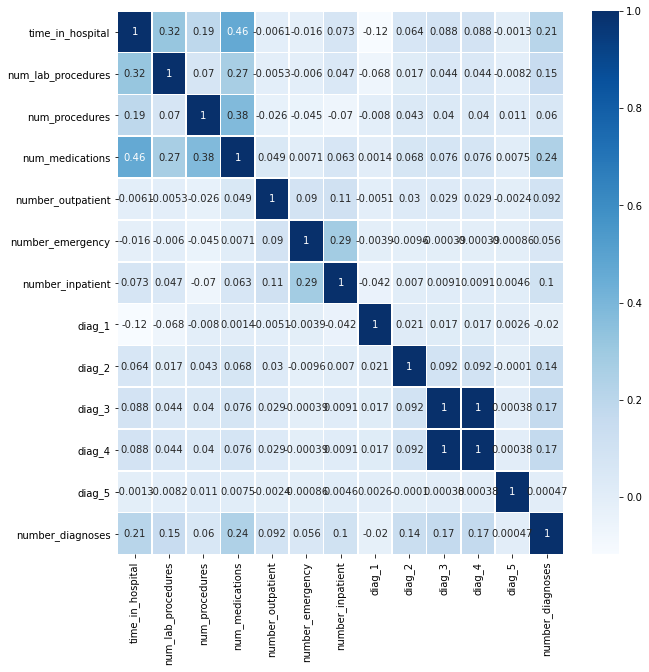

In [100]:
# To check the corellation
sns.heatmap(hosp_Read[num_cols].corr(),annot=True,cmap="Blues",linewidths=.7,xticklabels=True, yticklabels=True)

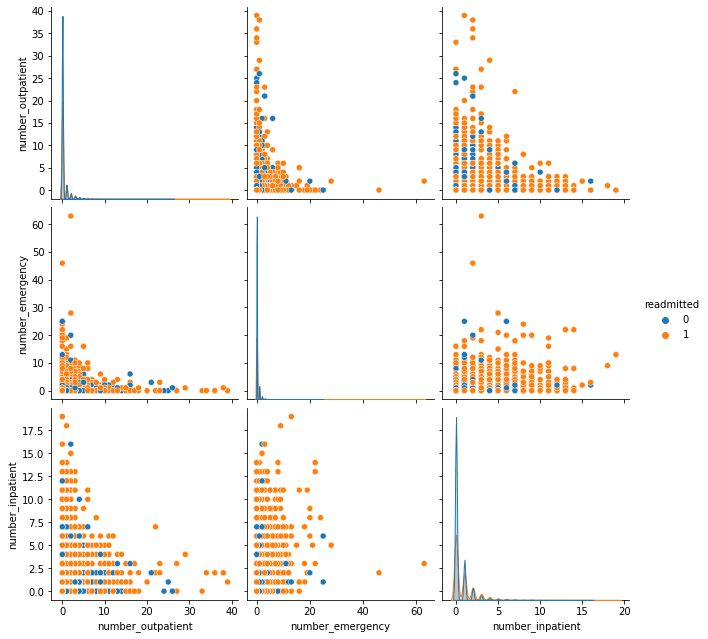

In [101]:
Admission = ['number_outpatient','number_emergency', 'number_inpatient']
fig=sns.pairplot(hosp_Read, vars=Admission, hue='readmitted', size=3)
fig

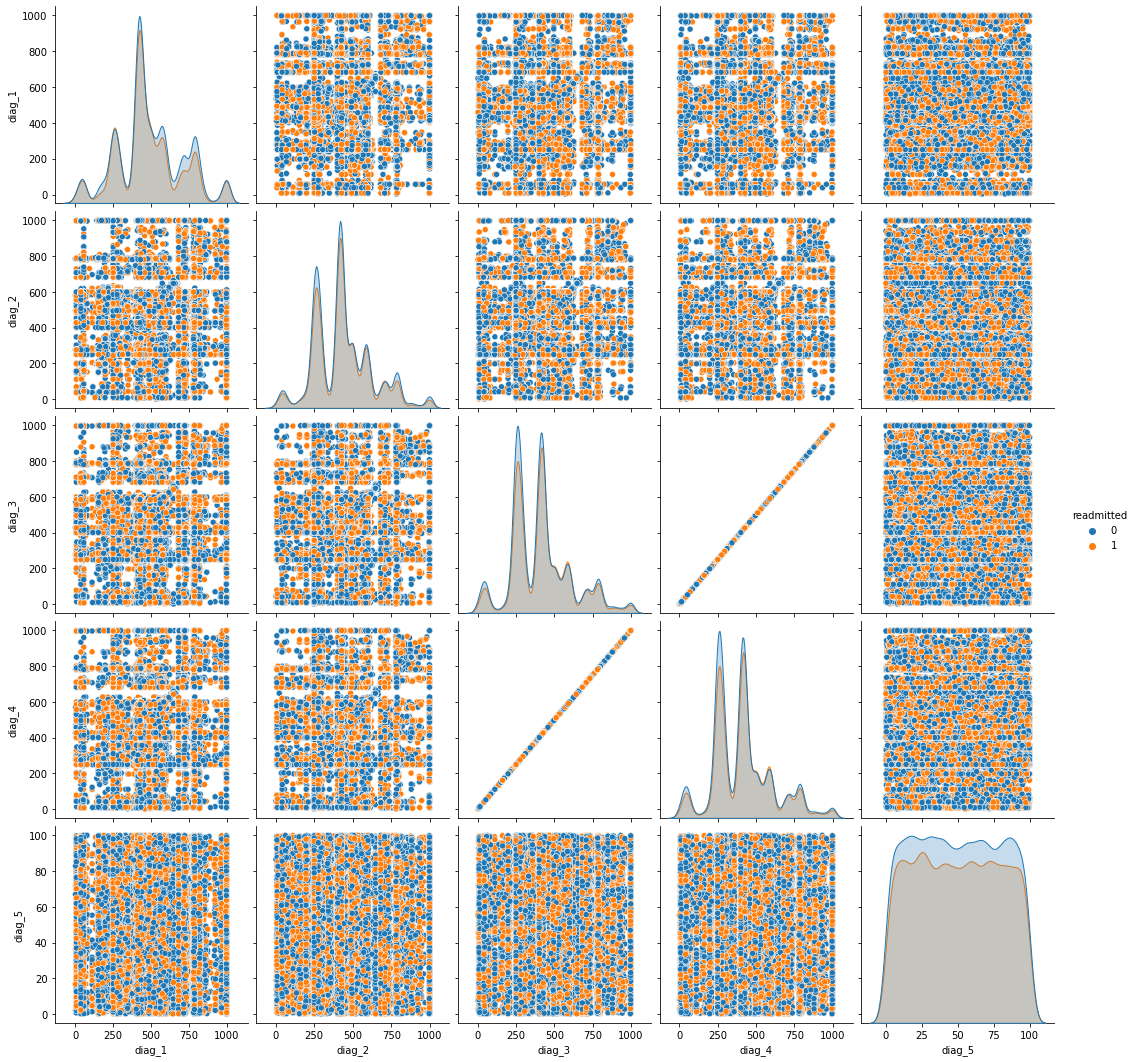

In [114]:
Diagnosis = ['diag_1','diag_2', 'diag_3', 'diag_4', 'diag_5']
fig=sns.pairplot(hosp_Read, vars=Diagnosis, hue='readmitted', size=3)
fig

# Train-test split

In [30]:
X = hosp_Read.drop(['readmitted'], axis = 1)
y = hosp_Read['readmitted']

import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [31]:
print('Y Target Size:', len(y_train))
print('X Train Size:', len(X_train))
print('X Test  Size:', len(X_test))
print('Y Target Size:', len(y_test))

Y Target Size: 51302
X Train Size: 51302
X Test  Size: 12826
Y Target Size: 12826


In [32]:
# Dummifcation of categorical variables
X_train = pd.get_dummies(X_train, columns= ['race', 'gender', 'change', 'diabetesMed'], drop_first=True)
X_test = pd.get_dummies(X_test, columns= ['race', 'gender', 'change', 'diabetesMed'], drop_first=True)

# Encoding for the medications
medications = ['X1','X2','X3','X4','X5','X6','X7','X9','X10','X11','X12','X13','X14','X15','X16','X17','X20','X21','X22','X23']

for col in medications:
    X_train[col] = X_train[col].replace(['No','Steady','Up','Down','None','Norm','>7','>8','>200','>300'],[0,1,1,1,0,1,1,1,1,1])
    X_test[col] = X_test[col].replace(['No','Steady','Up','Down','None','Norm','>7','>8','>200','>300'],[0,1,1,1,0,1,1,1,1,1])
    

In [33]:
# Changing the 

for i in range(0,10):
    X_train['age'] = X_train['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)
    X_test['age'] = X_test['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)

In [34]:
X_train.age.value_counts()

8     13210
7     11524
6      8757
9      8674
5      4794
4      1808
10     1422
3       844
2       237
1        32
Name: age, dtype: int64

In [35]:
X_test.age.value_counts()

8     3255
7     2882
6     2265
9     2087
5     1254
4      463
10     364
3      193
2       55
1        8
Name: age, dtype: int64

In [36]:
X_train.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,...,X21,X22,X23,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,change_No,diabetesMed_Yes
encounter_id,,,,,,,,,,,,,,,,,,,,,
178385598,9,5,54,2,21,2,0,0,820.0,599.00,...,0,0,0,0,0,0,0,0,0,1
69574596,8,6,65,0,15,0,0,0,331.0,584.00,...,0,0,0,0,0,0,0,1,0,1
267754518,4,1,10,0,12,0,0,0,276.0,345.00,...,0,0,0,0,1,0,0,0,0,1
344272262,7,5,58,0,15,0,1,0,808.0,250.02,...,0,0,0,0,1,0,0,0,0,1
65425176,7,3,36,3,21,0,0,0,410.0,398.00,...,0,0,0,0,1,0,0,0,0,1


In [37]:
X_test.head(3)

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,...,X21,X22,X23,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,change_No,diabetesMed_Yes
encounter_id,,,,,,,,,,,,,,,,,,,,,
71228412,8,14,72,5,33,0,0,0,444.0,997.0,...,0,0,0,0,1,0,0,0,1,0
89744958,8,6,61,1,15,0,0,0,721.0,403.0,...,0,0,0,0,1,0,0,1,0,1
178511046,7,3,32,0,23,0,0,1,486.0,491.0,...,0,0,0,0,1,0,0,0,0,1


array([[<AxesSubplot:title={'center':'time_in_hospital'}>,
        <AxesSubplot:title={'center':'num_lab_procedures'}>,
        <AxesSubplot:title={'center':'num_procedures'}>,
        <AxesSubplot:title={'center':'num_medications'}>],
       [<AxesSubplot:title={'center':'number_outpatient'}>,
        <AxesSubplot:title={'center':'number_emergency'}>,
        <AxesSubplot:title={'center':'number_inpatient'}>,
        <AxesSubplot:title={'center':'diag_1'}>],
       [<AxesSubplot:title={'center':'diag_2'}>,
        <AxesSubplot:title={'center':'diag_3'}>,
        <AxesSubplot:title={'center':'diag_4'}>,
        <AxesSubplot:title={'center':'diag_5'}>],
       [<AxesSubplot:title={'center':'number_diagnoses'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

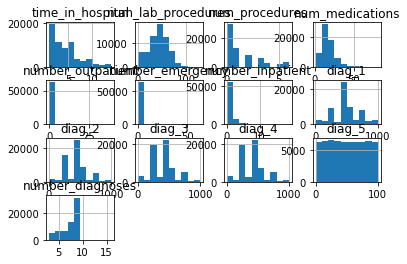

In [38]:
hosp_Read.hist(column=num_cols)

In [39]:
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols]=scaler.transform(X_train[num_cols])
X_test[num_cols]=scaler.transform(X_test[num_cols])

In [40]:
X_train.head(3)

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,...,X21,X22,X23,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,change_No,diabetesMed_Yes
encounter_id,,,,,,,,,,,,,,,,,,,,,
178385598,9,0.307692,0.414062,0.333333,0.289855,0.051282,0.0,0.0,0.820281,0.598796,...,0,0,0,0,0,0,0,0,0,1
69574596,8,0.384615,0.500000,0.000000,0.202899,0.000000,0.0,0.0,0.329317,0.583751,...,0,0,0,0,0,0,0,1,0,1
267754518,4,0.000000,0.070312,0.000000,0.159420,0.000000,0.0,0.0,0.274096,0.344032,...,0,0,0,0,1,0,0,0,0,1


In [41]:
X_test.head(3)

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,...,X21,X22,X23,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,change_No,diabetesMed_Yes
encounter_id,,,,,,,,,,,,,,,,,,,,,
71228412,8,1.000000,0.554688,0.833333,0.463768,0.0,0.0,0.000000,0.442771,0.997994,...,0,0,0,0,1,0,0,0,1,0
89744958,8,0.384615,0.468750,0.166667,0.202899,0.0,0.0,0.000000,0.720884,0.402207,...,0,0,0,0,1,0,0,1,0,1
178511046,7,0.153846,0.242188,0.000000,0.318841,0.0,0.0,0.052632,0.484940,0.490471,...,0,0,0,0,1,0,0,0,0,1


In [42]:
X_train.head(3)

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,...,X21,X22,X23,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,change_No,diabetesMed_Yes
encounter_id,,,,,,,,,,,,,,,,,,,,,
178385598,9,0.307692,0.414062,0.333333,0.289855,0.051282,0.0,0.0,0.820281,0.598796,...,0,0,0,0,0,0,0,0,0,1
69574596,8,0.384615,0.500000,0.000000,0.202899,0.000000,0.0,0.0,0.329317,0.583751,...,0,0,0,0,0,0,0,1,0,1
267754518,4,0.000000,0.070312,0.000000,0.159420,0.000000,0.0,0.0,0.274096,0.344032,...,0,0,0,0,1,0,0,0,0,1


In [43]:
X_test.head(3)

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,...,X21,X22,X23,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,change_No,diabetesMed_Yes
encounter_id,,,,,,,,,,,,,,,,,,,,,
71228412,8,1.000000,0.554688,0.833333,0.463768,0.0,0.0,0.000000,0.442771,0.997994,...,0,0,0,0,1,0,0,0,1,0
89744958,8,0.384615,0.468750,0.166667,0.202899,0.0,0.0,0.000000,0.720884,0.402207,...,0,0,0,0,1,0,0,1,0,1
178511046,7,0.153846,0.242188,0.000000,0.318841,0.0,0.0,0.052632,0.484940,0.490471,...,0,0,0,0,1,0,0,0,0,1


In [44]:
y_test.head(3)

encounter_id
71228412     1
89744958     0
178511046    1
Name: readmitted, dtype: category
Categories (2, int64): [0, 1]

In [45]:
y_train.head(3)

encounter_id
178385598    0
69574596     0
267754518    0
Name: readmitted, dtype: category
Categories (2, int64): [0, 1]

# Model Building


We will write a function for following functions. 

- Fit the model on train data
- Predict on train and test data

In [46]:
# Defining Evaluation metrics

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix as cm

def model_evaluation(actuals, predictions) :
    
    accuracy = accuracy_score(actuals, predictions)
    recall = recall_score(actuals, predictions)
    precision = precision_score(actuals, predictions)
    f1score = f1_score(actuals, predictions)
    
    print('\nConfusion Matrix :')
    print(confusion_matrix(actuals, predictions) )
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('f1score:%.3f'%f1score)
    
    print(' ')
    return accuracy, recall, precision,f1score
    

In [47]:
# Building Decesion tree model

from sklearn.model_selection import GridSearchCV

def model_building(model, params = None, k = 1) :
    
    if params == None :
        model.fit(X_train, y_train)
        
        # return fitted model & train-test predictions
        return (model, model.predict(X_train), model.predict(X_test))
    
    else :
        model_cv = GridSearchCV(model, param_grid = params, cv = k)
        model_cv.fit(X_train, y_train)
        model = model_cv.best_estimator_
        
        # return and extra object for all cross validation operations
        return (model_cv, model, model.predict(X_train), model.predict(X_test))
    
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
model, pred_train, pred_test = model_building(dtc)

In [48]:
model.feature_importances_

array([3.99690361e-02, 5.21146858e-02, 1.08234985e-01, 3.71267657e-02,
       8.50380507e-02, 1.47921634e-02, 1.05016853e-02, 5.53927916e-02,
       9.04421801e-02, 9.79977024e-02, 4.85205648e-02, 5.39805457e-02,
       1.36276055e-01, 3.43264733e-02, 6.17612321e-03, 1.07956455e-02,
       8.95132076e-03, 2.53168019e-03, 1.79689546e-03, 6.30291482e-05,
       6.01694884e-03, 1.01002827e-02, 7.64175982e-03, 6.43726082e-05,
       7.96472073e-03, 6.80102778e-03, 7.21973000e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.95362629e-03, 1.52388746e-03,
       7.11763818e-05, 0.00000000e+00, 1.18884312e-03, 1.44997435e-02,
       2.58399048e-03, 3.03692882e-03, 1.45479459e-02, 1.11235309e-02,
       8.13086199e-03])

In [49]:
importance = pd.DataFrame([model.feature_importances_], 
                          columns = X_train.columns)

importance.sort_values(by = 0, axis = 1, 
                       ascending = False, 
                       inplace = True)

In [50]:
importance

,diag_5,num_lab_procedures,diag_2,diag_1,num_medications,number_inpatient,diag_4,time_in_hospital,diag_3,age,...,X21,race_Asian,X14,X22,X11,X6,X15,X16,X17,X23
0,0.136276,0.108235,0.097998,0.090442,0.085038,0.055393,0.053981,0.052115,0.048521,0.039969,...,0.001524,0.001189,0.000722,0.000071,0.000064,0.000063,0.0,0.0,0.0,0.0


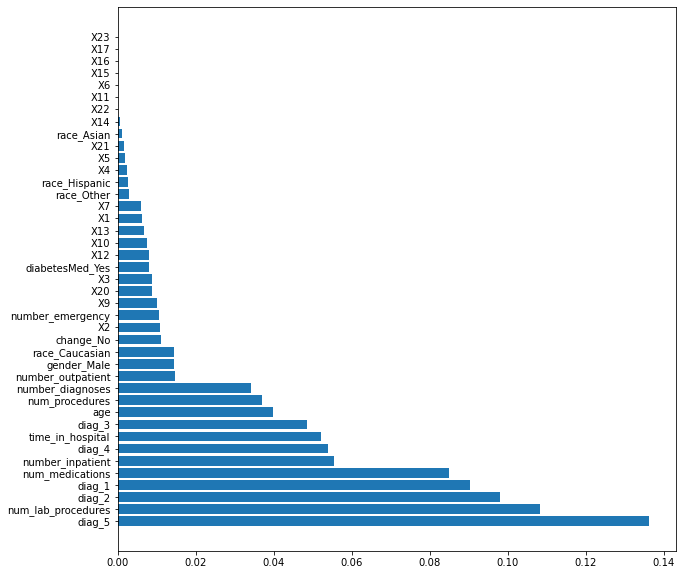

In [51]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = 10,10
plt.barh(importance.columns, importance.iloc[0].values)
plt.show()

In [52]:
model_evaluation(y_test, pred_test)


Confusion Matrix :
[[5133 1693]
 [1706 4294]]
accuracy:0.735
recall:0.716
precision:0.717
f1score:0.716
 


(0.7349914236706689,
 0.7156666666666667,
 0.7172206447302488,
 0.7164428130474682)

In [53]:
param_grid = {"criterion" : ["gini", "entropy"], 
              "min_samples_split": [2, 5],
              "max_depth": [None, 15],
              "min_samples_leaf": [1, 5]}

In [54]:
dtc_grid = model_building(dtc, params=param_grid, k=3)

In [55]:
# Best parameters
dtc_grid

(GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
              param_grid={'criterion': ['gini', 'entropy'],
                          'max_depth': [None, 15], 'min_samples_leaf': [1, 5],
                          'min_samples_split': [2, 5]}),
 DecisionTreeClassifier(criterion='entropy'),
 array([0, 0, 0, ..., 1, 0, 1], dtype=int64),
 array([1, 0, 1, ..., 1, 1, 0], dtype=int64))

In [56]:
model_evaluation(y_test, pred_test)


Confusion Matrix :
[[5133 1693]
 [1706 4294]]
accuracy:0.735
recall:0.716
precision:0.717
f1score:0.716
 


(0.7349914236706689,
 0.7156666666666667,
 0.7172206447302488,
 0.7164428130474682)

In [57]:
# Random forest classifier

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
classifier_rf = RandomForestClassifier()
classifier_rf.fit(X_train,y_train)

RandomForestClassifier()

In [58]:
classifier_rf.classes_

array([0, 1], dtype=int64)

In [59]:
train_pred = classifier_rf.predict(X_train)
test_pred = classifier_rf.predict(X_test)

In [60]:
train_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [61]:
test_pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [62]:
model_evaluation(y_test, test_pred)


Confusion Matrix :
[[5667 1159]
 [1812 4188]]
accuracy:0.768
recall:0.698
precision:0.783
f1score:0.738
 


(0.7683611414314674, 0.698, 0.7832429399663363, 0.7381686789459768)

In [63]:
importances_rfclf = classifier_rf.feature_importances_
importances_rfclf

array([4.83861430e-02, 5.65404577e-02, 9.15730124e-02, 3.65218988e-02,
       8.00714735e-02, 1.82182026e-02, 1.59014808e-02, 5.13682029e-02,
       8.67109256e-02, 8.62471683e-02, 7.02966694e-02, 7.04203712e-02,
       1.04041092e-01, 3.75114961e-02, 6.60958532e-03, 1.13895406e-02,
       1.09101317e-02, 2.81196955e-03, 1.60256725e-03, 3.67367018e-04,
       6.24383446e-03, 9.93630589e-03, 9.06950394e-03, 6.97759378e-05,
       7.85205100e-03, 7.11406264e-03, 8.03065342e-04, 6.24039663e-05,
       3.91987118e-05, 1.56575257e-04, 1.19621163e-02, 1.49663954e-03,
       4.77812799e-05, 1.73567353e-06, 1.43111553e-03, 1.37535053e-02,
       2.93761915e-03, 2.56841811e-03, 1.74770752e-02, 1.20464004e-02,
       7.43106071e-03])

In [64]:
importance_rfclf = pd.DataFrame([model.feature_importances_], 
                          columns = X_train.columns)

importance_rfclf.sort_values(by = 0, axis = 1, 
                       ascending = False, 
                       inplace = True)

importance_rfclf

,diag_5,num_lab_procedures,diag_2,diag_1,num_medications,number_inpatient,diag_4,time_in_hospital,diag_3,age,...,X21,race_Asian,X14,X22,X11,X6,X15,X16,X17,X23
0,0.136276,0.108235,0.097998,0.090442,0.085038,0.055393,0.053981,0.052115,0.048521,0.039969,...,0.001524,0.001189,0.000722,0.000071,0.000064,0.000063,0.0,0.0,0.0,0.0


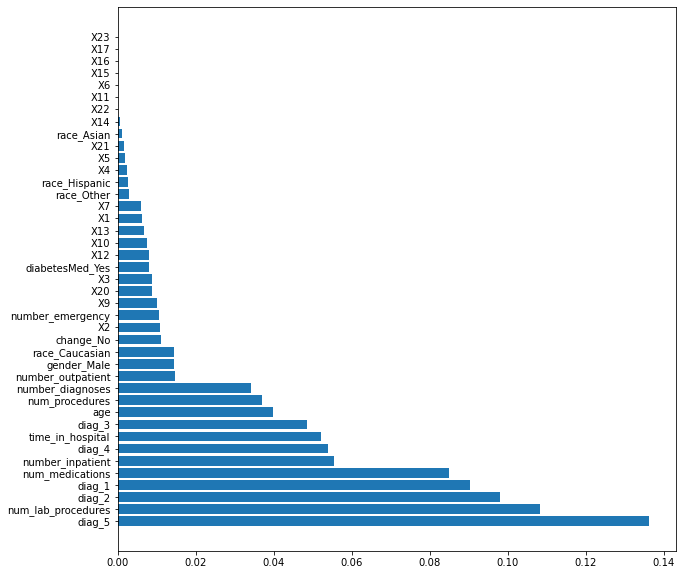

In [65]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = 10,10
plt.barh(importance_rfclf.columns, importance_rfclf.iloc[0].values)
plt.show()

In [66]:
model_evaluation(y_test, test_pred)


Confusion Matrix :
[[5667 1159]
 [1812 4188]]
accuracy:0.768
recall:0.698
precision:0.783
f1score:0.738
 


(0.7683611414314674, 0.698, 0.7832429399663363, 0.7381686789459768)

# Predicting for test data

In [67]:
hosp_Read_test = pd.read_csv('test-1617360461595-1660719701431.csv')

In [68]:
hosp_Read_test.shape

(16647, 48)

In [69]:
hosp_Read_test.columns

Index(['index', 'encounter_id', 'patient_id', 'race', 'gender', 'age',
       'weight', 'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'diag_4', 'diag_5', 'number_diagnoses', 'X1', 'X2', 'X3', 'X4', 'X5',
       'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16',
       'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'change',
       'diabetesMed'],
      dtype='object')

In [70]:
hosp_Read_test = hosp_Read_test.replace('?', np.nan)
hosp_Read_test = hosp_Read_test.replace('Unknown/Invalid', np.nan)

hosp_Read_test.dropna(inplace = True)

hosp_Read_test = hosp_Read_test.drop(columns= ['weight', 'medical_specialty'], axis=1)
hosp_Read_test = hosp_Read_test.drop(columns= ['index', 'patient_id'], axis=1)
hosp_Read_test = hosp_Read_test.set_index(['encounter_id'])


In [71]:
hosp_Read_test.isnull().sum()

race                  0
gender                0
age                   0
time_in_hospital      0
num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
diag_1                0
diag_2                0
diag_3                0
diag_4                0
diag_5                0
number_diagnoses      0
X1                    0
X2                    0
X3                    0
X4                    0
X5                    0
X6                    0
X7                    0
X8                    0
X9                    0
X10                   0
X11                   0
X12                   0
X13                   0
X14                   0
X15                   0
X16                   0
X17                   0
X18                   0
X19                   0
X20                   0
X21                   0
X22                   0
X23                   0
X24                   0
X25                   0
change          

In [72]:
hosp_Read_test.nunique()

race                    3
gender                  2
age                    10
time_in_hospital       14
num_lab_procedures     73
num_procedures          7
num_medications        40
number_outpatient       9
number_emergency        6
number_inpatient        6
diag_1                 91
diag_2                 92
diag_3                 83
diag_4                 83
diag_5                232
number_diagnoses        7
X1                      1
X2                      4
X3                      3
X4                      2
X5                      2
X6                      1
X7                      3
X8                      1
X9                      4
X10                     4
X11                     1
X12                     2
X13                     3
X14                     2
X15                     1
X16                     1
X17                     1
X18                     1
X19                     1
X20                     4
X21                     1
X22                     1
X23         

In [73]:
hosp_Read_test = hosp_Read_test.drop(columns= ['X8', 'X18', 'X19', 'X24', 'X25'], axis=1)

import warnings
warnings.filterwarnings('ignore')

hosp_Read_test['diag_1'] = hosp_Read_test['diag_1'].str.replace('[VE]','')
hosp_Read_test['diag_2'] = hosp_Read_test['diag_2'].str.replace('[VE]','')
hosp_Read_test['diag_3'] = hosp_Read_test['diag_3'].str.replace('[VE]','')
hosp_Read_test['diag_4'] = hosp_Read_test['diag_4'].str.replace('[VE]','')

hosp_Read_test['diag_1'] = hosp_Read_test['diag_1'].astype(float)
hosp_Read_test['diag_2'] = hosp_Read_test['diag_2'].astype(float)
hosp_Read_test['diag_3'] = hosp_Read_test['diag_3'].astype(float)
hosp_Read_test['diag_4'] = hosp_Read_test['diag_4'].astype(float)

In [74]:
num_cols = hosp_Read_test.select_dtypes(include=['int64','float64']).columns
cat_cols = hosp_Read_test.select_dtypes(include=['object','category','bool']).columns

In [75]:
hosp_Read_test[cat_cols] = hosp_Read_test[cat_cols].astype('category')

<AxesSubplot:>

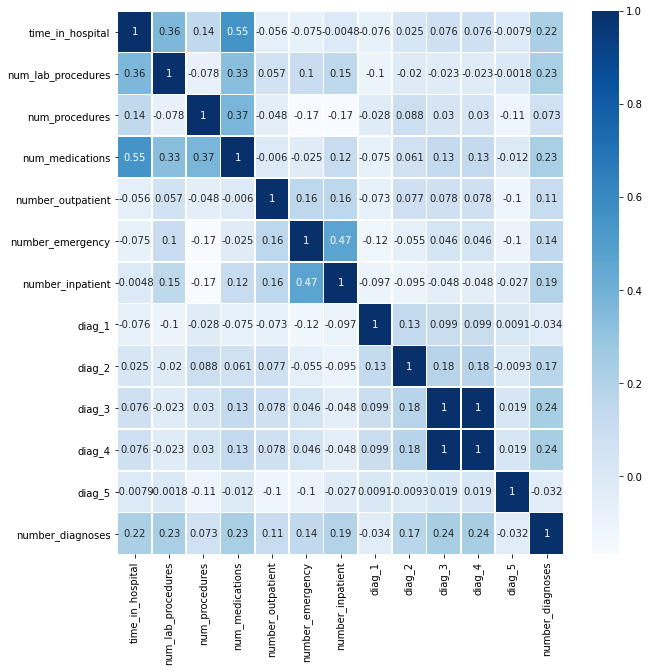

In [121]:
# To check the corellation
sns.heatmap(hosp_Read_test[num_cols].corr(),annot=True,cmap="Blues",linewidths=.7,xticklabels=True, yticklabels=True)

In [76]:
hosp_Read_test.race.value_counts()

Caucasian          242
AfricanAmerican      9
Other                5
Name: race, dtype: int64

In [78]:
hosp_Read_test['race_Asian'] = 0

In [79]:
hosp_Read_test = pd.get_dummies(hosp_Read_test, columns= ['race'], drop_first=True)

In [80]:
hosp_Read_test['race_Hispanic'] = 0

In [86]:
last_column = hosp_Read_test.pop('race_Other')
hosp_Read_test.insert(40, 'race_Other', last_column)

In [88]:
# Dummifcation of categorical variables
hosp_Read_test = pd.get_dummies(hosp_Read_test, columns= ['gender', 'change', 'diabetesMed'], drop_first=True)


# Encoding for the medications
medications = ['X1','X2','X3','X4','X5','X6','X7','X9','X10','X11','X12','X13','X14','X15','X16','X17','X20','X21','X22','X23']

for col in medications:
    hosp_Read_test[col] = hosp_Read_test[col].replace(['No','Steady','Up','Down','None','Norm','>7','>8','>200','>300'],[0,1,1,1,0,1,1,1,1,1])

In [90]:
# Changing the age column

for i in range(0,10):
    hosp_Read_test['age'] = hosp_Read_test['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', i+1)

In [91]:
hosp_Read_test.head(3)

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,...,X21,X22,X23,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,change_No,diabetesMed_Yes
encounter_id,,,,,,,,,,,,,,,,,,,,,
92442756,8,1,62,0,17,4,0,0,428.0,427.0,...,0,0,0,0,1,0,0,0,1,0
91153740,8,8,71,1,15,0,0,0,998.0,682.0,...,0,0,0,0,1,0,0,0,1,1
244875738,7,4,31,2,13,0,0,0,715.0,285.0,...,0,0,0,0,1,0,0,0,1,0


In [93]:
pred = classifier_rf.predict(hosp_Read_test)

In [95]:
pred

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [96]:
hosp_Read_test.index

Int64Index([ 92442756,  91153740, 244875738,  37497480, 102912432,  82430436,
             38996160, 403167836, 323700980,  42024846,
            ...
            251271312,  76955742,  90850632, 106930566, 259417050, 264711006,
            121896492, 236917866, 227385372,  89583978],
           dtype='int64', name='encounter_id', length=256)

In [97]:
Submission_AjayShankar_Results = pd.DataFrame()
Submission_AjayShankar_Results['encounter_id'] = hosp_Read_test.index
Submission_AjayShankar_Results['readmitted'] = pred

Submission_AjayShankar_Results.head(3)

,encounter_id,readmitted
0,92442756,1
1,91153740,1
2,244875738,1


In [98]:
Submission_AjayShankar_Results.to_csv('Submission_AjayShankar_Results.csv', index = False)

In [123]:
hosp_Read_test['readmitted'] = pred

In [124]:
hosp_Read_test.head(3)

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,...,X22,X23,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male,change_No,diabetesMed_Yes,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,
92442756,8,1,62,0,17,4,0,0,428.0,427.0,...,0,0,0,1,0,0,0,1,0,1
91153740,8,8,71,1,15,0,0,0,998.0,682.0,...,0,0,0,1,0,0,0,1,1,1
244875738,7,4,31,2,13,0,0,0,715.0,285.0,...,0,0,0,1,0,0,0,1,0,1


In [126]:
hosp_Read_test.to_csv('Testdata_Final_WithPrediction.csv', index = True)